### Aula 14 : Segmentação: Gradientes

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math as m

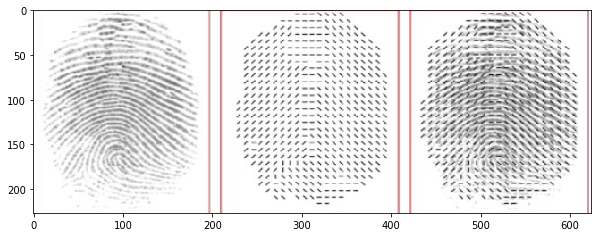

In [42]:
#Resultado Esperado
analise = cv2.imread('Picture1.png')

plt.figure(figsize = (10,10))
plt.imshow(analise)

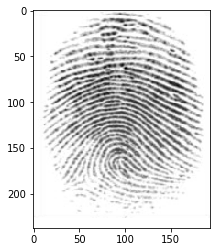

In [43]:
#Imagem para Análise
img = cv2.imread('digital.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap = 'gray')

Text(0.5, 1.0, 'Y')

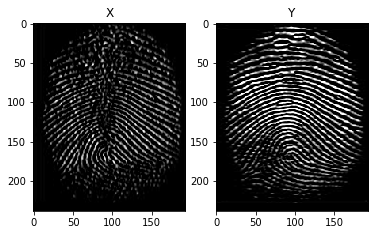

In [44]:
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize = 3)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize = 3)

plt.subplot(1,2,1)
plt.imshow(sobelx,cmap = 'gray')
plt.title('X')

plt.subplot(1,2,2)
plt.imshow(sobely,cmap = 'gray')
plt.title('Y')


In [45]:
#Função para dividir as matrizes e tratar os casos de divisão por 0
def divmat(matx,maty):
    division = np.zeros_like(matx)
    division = division.astype('float16')
    for i in range (matx.shape[0]):
        for j in range (matx.shape[1]):
            if matx[i][j] == 0:
                if maty[i][j] != 0 :
                    value = 1
                else :
                    value = 0
                
            else:
                value = maty[i][j]/matx[i][j]
            division[i][j] = value

    return division
                
    

In [46]:
division = divmat(sobelx,sobely)

In [47]:
#Função para obter os ângulos em radianos
def atanMat(mat):
    map = np.zeros_like(mat)
    map = map.astype('float16')
    for i in range (mat.shape[0]):
        for j in range(mat.shape[1]):
            map[i][j] = m.atan(mat[i][j])
    return map

In [48]:
#Normaliza a matriz de ângulos
def normalize(mat):
    mat = mat*255
    mat = mat.astype('uint8')
    return mat

In [49]:
map = atanMat(division)

In [50]:
tmap = np.divide(map,m.pi)

In [51]:
tmap= normalize(tmap)

Text(0.5, 1.0, 'Mapa de características')

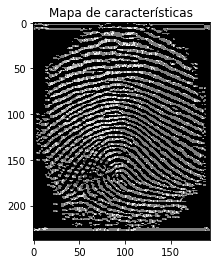

In [53]:
plt.imshow(tmap,cmap = 'gray')
plt.title('Mapa de características')

Text(0.5, 1.0, 'Obtida')

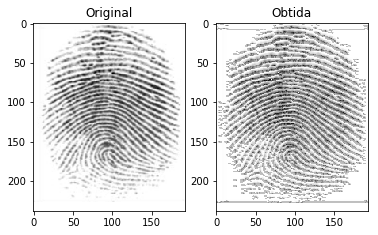

In [55]:
nimg = np.bitwise_not(img)
processed = tmap + nimg
processed = np.bitwise_not(processed)

plt.subplot(1,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(processed,cmap = 'gray')
plt.title('Obtida')